In [27]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
a = 1
b = 5
m = 4
n = 8
h = (b - a) / n

In [29]:
def find_lambda(A, b):
    return np.linalg.solve(A, b)
def z(xx, lambdA, m):
    return sum([lambdA[i] * xx**i for i in range(m)])
def a(n):
    return (n[0] + n[-1]) / 2
def g(n):
    return np.sqrt(n[0]*n[-1])
def h1(n):
    return 2/(1/n[0] + 1/n[-1])
def delta(x, y, nz):
    res = []
    res.append(abs(nz(a(x)) - a(y)))
    res.append(abs(nz(g(x)) - g(x)))
    res.append(abs(nz(a(x)) - g(x)))
    res.append(abs(nz(g(x)) - a(x)))
    res.append(abs(nz(h1(x)) - a(x)))
    res.append(abs(nz(a(x)) - h1(x)))
    res.append(abs(nz(h1(x)) - h1(x)))
    res.append(abs(nz(h1(x)) - g(x)))
    res.append(abs(nz(g(x)) - h1(x)))
    return res

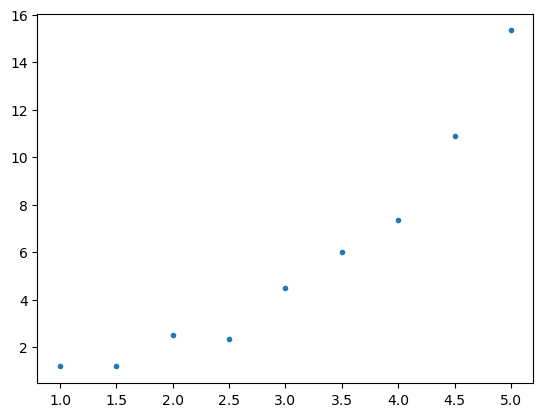

In [30]:
x = np.asarray([1+i*h for i in range(n+1)])
y = np.asarray([1.22, 1.18, 2.5, 2.35, 4.47, 6.02, 7.35, 10.9, 15.33])
A = np.array([[sum(x[k] ** (i+j) for k in range(n+1)) for j in range(m)] for i in range(m)])
b = np.array([sum(y[k] * (x[k] ** i) for k in range(n+1)) for i in range(m)]) 
lambdA = find_lambda(A, b)
new_z = lambda x: z(x, lambdA, m)
plt.plot(x, y, '.')


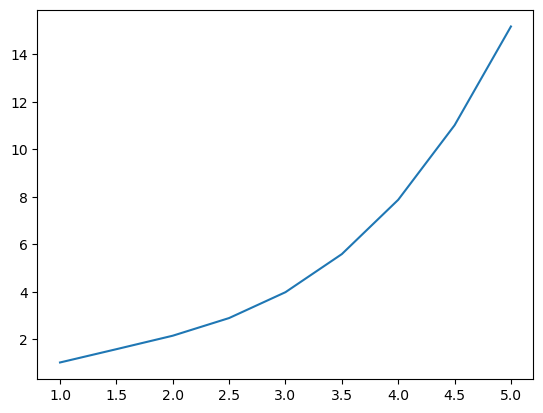

In [31]:
plt.plot(x, z(x, lambdA, m))

In [32]:
# big_delta = sum([(y[i] - z(x)[i]) for i in range(m+1)])**2
# big_delta = np.sqrt(big_delta) / np.sqrt(n)
# small_delta = sum([y[i]**2 for i in range(n+1)])
# small_delta = big_delta / np.sqrt(small_delta)
# print(big_delta, small_delta)

In [33]:
print(delta(x, y, new_z))
nA = np.asarray([[(n), sum(1/x)], [sum(1/x), sum(1/x**2)]])
nb = np.asarray([sum(1/y), sum(1/(x*y))])
res = np.linalg.solve(nA, nb)
res_fun = lambda x: x/(res[0]*x+res[1])
ny = np.asarray(list(map(res_fun, x)))

[4.286125541125495, 0.23937312636161456, 1.7528064813747157, 0.5245588961385956, 1.2304756560310561, 2.3222077922078386, 0.10285767730227713, 0.46654363353084594, 0.8087744371947376]


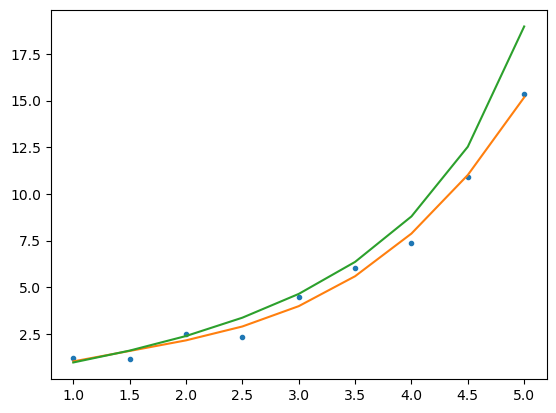

In [34]:
plt.plot(x, y, '.')
plt.plot(x, z(x, lambdA, m))
plt.plot(x, ny)

In [35]:
mse = np.sqrt(sum((y[i]-ny[i])**2 for i in range(len(x))))
mse/np.sqrt(n)

1.5580573381138751